# Measurements, Errors and Uncertainty

---
## Learning Objectives

- Develop an understanding of basic statistical descriptors that will be used in practical physics
- Be able to calculate these statistical descriptors using computational tools.

For the practical labs, you are going to need to develop a solid understanding of measurement errors and uncertainty. Provided below is a summary of the topics covered in your lecture. This information was taken from Measurements and their Uncertainties: [A Practical Guide to Modern Error Analysis](https://find.shef.ac.uk/primo-explore/fulldisplay?docid=44SFD_ALMA_DS21177067650001441&context=L&vid=44SFD_VU2&lang=en_US&search_scope=SCOP_EVERYTHING&adaptor=Local%20Search%20Engine&tab=everything&query=any,contains,hughes%20and%20hase&offset=0) by Hughes and Hase, which is a useful book that covers the content at an accessible level.

---
## Accuracy, Precision and Types of Error

When we take a measurement, we cannot say with absolute certainty what the value of the measurement is, instead we report our best estimate along with its associated uncertainty (or error). A value reported with a small uncertainty may be considered to be **precise**, but this does not necessarily mean that it is **accurate**. 

If we were to measure something many times, we would be able to plot a distribution of our measurements (e.g. the number of times we measure the value to be x). Our best estimate of the value would be equal to the mean of our measured values. If our distribution of measurements is narrow (the spread of our measurements is small) we would say that the best estimate is precise (plots a and c) and if our best estimate was close to the known value (plots a and b) we would say it is accurate. 

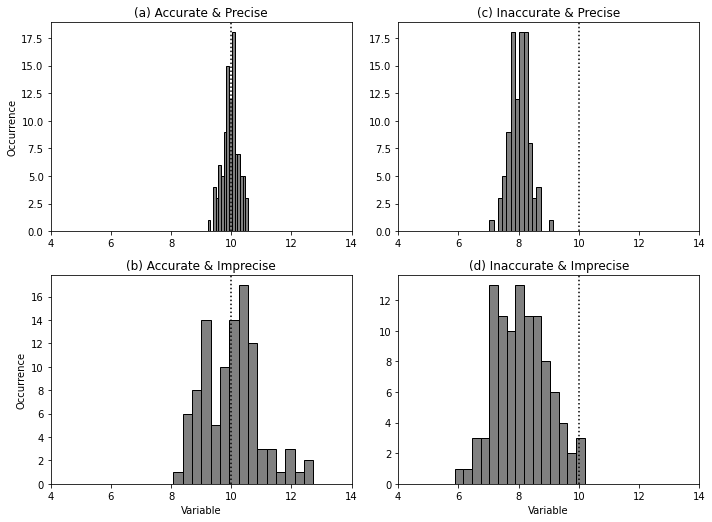

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Set seed for reproducibility
np.random.seed(42)

# True value (the correct value we want to measure)
true_value = 10

# Generate synthetic measurement data
def generate_data(mean, std_dev, size=100):
    return np.random.normal(loc=mean, scale=std_dev, size=size)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Subplot (a): Accurate & Precise
data_a = generate_data(mean=10, std_dev=0.3)
axes[0, 0].hist(data_a, bins=15, color='gray', edgecolor='black')
axes[0, 0].axvline(true_value, linestyle='dotted', color='black')
axes[0, 0].set_title("(a) Accurate & Precise")
axes[0, 0].set_xlim(4, 14)
axes[0, 0].set_ylabel("Occurrence")

# Subplot (b): Accurate & Imprecise
data_b = generate_data(mean=10, std_dev=1.0)
axes[1, 0].hist(data_b, bins=15, color='gray', edgecolor='black')
axes[1, 0].axvline(true_value, linestyle='dotted', color='black')
axes[1, 0].set_title("(b) Accurate & Imprecise")
axes[1, 0].set_xlim(4, 14)
axes[1, 0].set_ylabel("Occurrence")
axes[1, 0].set_xlabel("Variable")

# Subplot (c): Inaccurate & Precise
data_c = generate_data(mean=8, std_dev=0.3)
axes[0, 1].hist(data_c, bins=15, color='gray', edgecolor='black')
axes[0, 1].axvline(true_value, linestyle='dotted', color='black')
axes[0, 1].set_title("(c) Inaccurate & Precise")
axes[0, 1].set_xlim(4, 14)

# Subplot (d): Inaccurate & Imprecise
data_d = generate_data(mean=8, std_dev=1.0)
axes[1, 1].hist(data_d, bins=15, color='gray', edgecolor='black')
axes[1, 1].axvline(true_value, linestyle='dotted', color='black')
axes[1, 1].set_title("(d) Inaccurate & Imprecise")
axes[1, 1].set_xlim(4, 14)
axes[1, 1].set_xlabel("Variable")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Our measurement can be both accurate and precise (a), accurate but imprecise (b), precise but inaccurate (c), or neither accurate nor precise (d).

The source of the error associated with a measurement may be attributed to many factors, but these may be categorised as either **random errors**, **systematic errors** or **mistakes**:

> **Random errors** may be characterised by a large spread in the measurements that we take and therefore impact the precision of our measurement. Although we take care to control the impact of all external variables in an experiment, parameters out of our control will still impact the measurements we take leading to a distribution. For example, if I roll a toy car down a ramp and measure how far it travels, I can take care to ensure the car is released from the same point on the ramp each time, but I cannot control small fluctuations in temperature or the direction of currents in the air. 


> **Systematic errors** are characterised by a shifting of our measurements away from the known value, these affect all measurements taken and impact the accuracy of our measurement. Using the example above, if I were to measure the distance the toy car had travelled, but started my measurement 10 cm away from the point of release, this would shift my measured distance away from the distance the car really travelled. 


> **Mistakes**. These may be difficult to spot and can negatively impact the quality of the data we are using. A mistake may be as simple as recording a value of 3.14 as 3.41. It would be difficult to determine if a mistake has been made or the value is just larger than anticipated when performing analysis. To reduce the frequency of mistakes we make, we should take care when reading scales, converting units and using measurement equipment.

---
## The Mean

When we take a series of measurements ($N$ repeats), we will measure a distribution of values such as those shown in the histograms above. The mean of these values, $\bar{x}$, is taken as our best estimate as taking the mean is the best way to reduce the impact of random errors in our measurements. The mean is calculated as follows:

$$
\bar{x} = \frac{1}{N}\sum^{N}_{i=1}x_i = \frac{1}{N}\left(x_1 + x_2 + x_3 + ... + x_N \right).
$$

---
## Standard Deviation

Another important property to consider is the spread of our distribution, the size of the spread allows us to determine the precision of our measured value, with a smaller spread corresponding to a more precise value. The statistical approach to determining the spread of our distribution is to calculate the **standard deviation**. 

For a given data point in a distribution, there will be some deviation between it and the mean:

$$ 
d_i = x_i - \bar{x}
$$

Across the entire distribution, the average of the deviations is likely going to sum to zero assuming that all of the data points are evenly distributed around the mean, therefore we cannot use the sum of deviations as a measure of the distribution spread. 

The square of the deviations will be positive regardless of whether or not the deviation is positive or negative, therefore we can calculate the average of the squared deviations, this is known as the **variance**. The square-root of the variance is equal to the **standard deviation**, $\sigma$:

$$
\sigma_{N-1} = \sqrt{\frac{1}{N}\left(d_1^2 +d_2^2 +d_3^2 + ... + d_N^2\right)},
$$

which is more commonly expressed as:

$$
\sigma_{N-1} = \sqrt{\frac{\sum{\left(x_i-\bar{x}\right)^2}}{N-1}}.
$$

The function is normalised by N-1 rather than N as the mean has already been determined using this dataset, meaning that there is one less independent value to be used when calculating the variance.

> The **standard deviation** is a measure of how much the individual measurements in a sample differ from the mean value of all the measurements in that sample.

### Standard Deviation Visualised

To further understand the standard deviation, it often helps to visualise what this means by looking at the distribution itself. The figure below shows that if we take more and more measurements, the histogram of the measured data becomes more and more representative of a Gaussian distribution (a normal distribution):

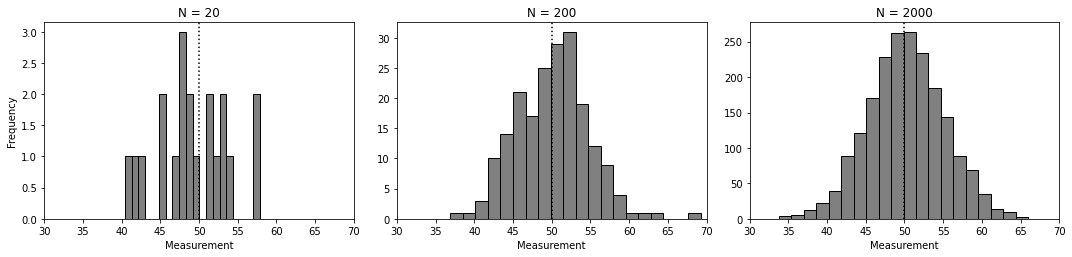

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
mean = 50
std_dev = 5

# Sample sizes
sample_sizes = [20, 200, 2000]
data_samples = [np.random.normal(loc=mean, scale=std_dev, size=n) for n in sample_sizes]

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

# Plot histograms
for ax, data, n in zip(axes, data_samples, sample_sizes):
    ax.hist(data, bins=20, color='gray', edgecolor='black')
    ax.axvline(mean, linestyle='dotted', color='black')  # True mean
    ax.set_title(f"N = {n}")
    ax.set_xlabel("Measurement")
    ax.set_xlim(30, 70)

axes[0].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This simply means that as we take measurements, we expect most of them to be centred around one specific value (the mean), and the more extreme the difference our measurement from the mean, the less likely it is we are going to get that measurement.

One of the characteristic features of a Gaussian distribution is the *standard deviation* - this tells us how wide it is. For example, the two plots below show a the Gaussian probability distribution fitted to two different datasets, both with $N=2000$, but each having different standard deviations:

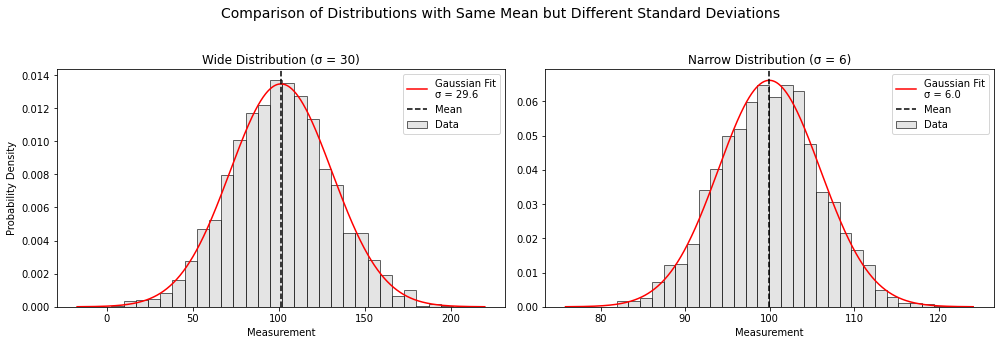

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Common parameters
mean = 100
sample_size = 2000

# Generate two datasets with different standard deviations
data_wide = np.random.normal(loc=mean, scale=30, size=sample_size)
data_narrow = np.random.normal(loc=mean, scale=6, size=sample_size)

# Fit normal distributions
mu_wide, std_wide = norm.fit(data_wide)
mu_narrow, std_narrow = norm.fit(data_narrow)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# First subplot: σ = 30
x1 = np.linspace(mu_wide - 4*std_wide, mu_wide + 4*std_wide, 1000)
pdf1 = norm.pdf(x1, mu_wide, std_wide)
axes[0].hist(data_wide, bins=30, density=True, color='lightgray', edgecolor='black', alpha=0.6, label="Data")
axes[0].plot(x1, pdf1, 'r-', label=f"Gaussian Fit\nσ = {std_wide:.1f}")
axes[0].axvline(mu_wide, color='black', linestyle='--', label="Mean")
axes[0].set_title("Wide Distribution (σ = 30)")
axes[0].set_xlabel("Measurement")
axes[0].set_ylabel("Probability Density")
axes[0].legend()

# Second subplot: σ = 6
x2 = np.linspace(mu_narrow - 4*std_narrow, mu_narrow + 4*std_narrow, 1000)
pdf2 = norm.pdf(x2, mu_narrow, std_narrow)
axes[1].hist(data_narrow, bins=30, density=True, color='lightgray', edgecolor='black', alpha=0.6, label="Data")
axes[1].plot(x2, pdf2, 'r-', label=f"Gaussian Fit\nσ = {std_narrow:.1f}")
axes[1].axvline(mu_narrow, color='black', linestyle='--', label="Mean")
axes[1].set_title("Narrow Distribution (σ = 6)")
axes[1].set_xlabel("Measurement")
axes[1].legend()

fig.suptitle("Comparison of Distributions with Same Mean but Different Standard Deviations", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

These distributions may look the same as they both have the classic Gaussian shape, however you should notice that the range given on the x-axis is much larger, and the peak of the curve is much lower for the distribution with the greater standard deviation. This becomes very clear if both distributions are plot using the same $x$ and $y$ axis limits. 

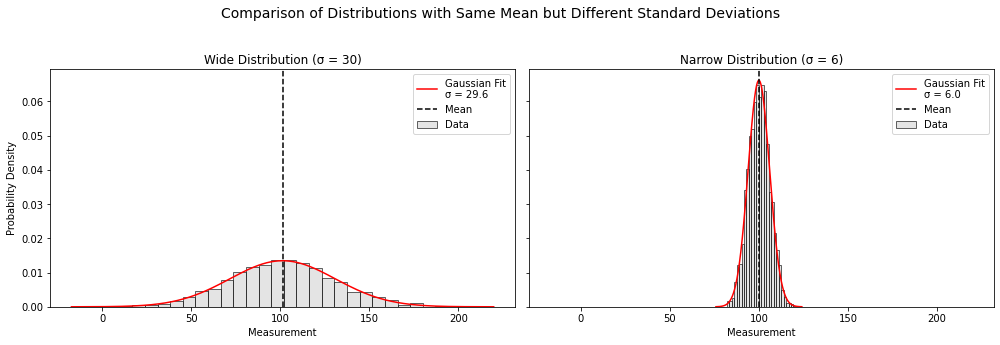

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Common parameters
mean = 100
sample_size = 2000

# Generate two datasets with different standard deviations
data_wide = np.random.normal(loc=mean, scale=30, size=sample_size)
data_narrow = np.random.normal(loc=mean, scale=6, size=sample_size)

# Fit normal distributions
mu_wide, std_wide = norm.fit(data_wide)
mu_narrow, std_narrow = norm.fit(data_narrow)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True, sharex = True)

# First subplot: σ = 30
x1 = np.linspace(mu_wide - 4*std_wide, mu_wide + 4*std_wide, 1000)
pdf1 = norm.pdf(x1, mu_wide, std_wide)
axes[0].hist(data_wide, bins=30, density=True, color='lightgray', edgecolor='black', alpha=0.6, label="Data")
axes[0].plot(x1, pdf1, 'r-', label=f"Gaussian Fit\nσ = {std_wide:.1f}")
axes[0].axvline(mu_wide, color='black', linestyle='--', label="Mean")
axes[0].set_title("Wide Distribution (σ = 30)")
axes[0].set_xlabel("Measurement")
axes[0].set_ylabel("Probability Density")
axes[0].legend()

# Second subplot: σ = 6
x2 = np.linspace(mu_narrow - 4*std_narrow, mu_narrow + 4*std_narrow, 1000)
pdf2 = norm.pdf(x2, mu_narrow, std_narrow)
axes[1].hist(data_narrow, bins=30, density=True, color='lightgray', edgecolor='black', alpha=0.6, label="Data")
axes[1].plot(x2, pdf2, 'r-', label=f"Gaussian Fit\nσ = {std_narrow:.1f}")
axes[1].axvline(mu_narrow, color='black', linestyle='--', label="Mean")
axes[1].set_title("Narrow Distribution (σ = 6)")
axes[1].set_xlabel("Measurement")
axes[1].legend()

fig.suptitle("Comparison of Distributions with Same Mean but Different Standard Deviations", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Regardless of what the mean or standard deviation for a given distribution is, the proportion of measurements we would expect to fall within one standard deviation from the mean remains the same. The highlighted regions on each plot below show us the $\pm 1\sigma$, $\pm 2\sigma$ and $\pm 3\sigma$ ranges.

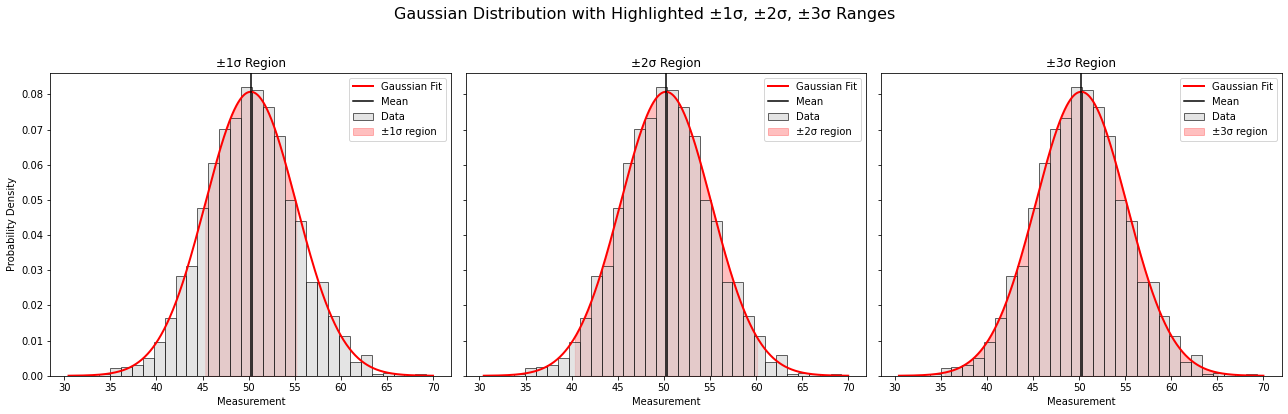

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Parameters
mean_true = 50
std_dev = 5
N = 2000

# Generate data
data = np.random.normal(loc=mean_true, scale=std_dev, size=N)

# Fit a normal distribution to the data
mu_fit, std_fit = norm.fit(data)

# Prepare x and PDF
x = np.linspace(mu_fit - 4*std_fit, mu_fit + 4*std_fit, 1000)
pdf = norm.pdf(x, mu_fit, std_fit)

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
std_ranges = [1, 2, 3]

for ax, sigma in zip(axes, std_ranges):
    # Plot histogram
    counts, bins, patches = ax.hist(data, bins=30, density=True, color='lightgray', edgecolor='black', alpha=0.6, label="Data")
    
    # Plot Gaussian fit
    ax.plot(x, pdf, 'r-', linewidth=2, label="Gaussian Fit")
    
    # Fill area under curve for ±Nσ
    x_fill = np.linspace(mu_fit - sigma * std_fit, mu_fit + sigma * std_fit, 1000)
    pdf_fill = norm.pdf(x_fill, mu_fit, std_fit)
    ax.fill_between(x_fill, pdf_fill, color='red', alpha=0.25, label=f"±{sigma}σ region")
    
    # Vertical line at mean
    ax.axvline(mu_fit, color='black', linestyle='-', label='Mean')
    
    # Labels and title
    ax.set_title(f"±{sigma}σ Region")
    ax.set_xlabel("Measurement")
    if sigma == 1:
        ax.set_ylabel("Probability Density")
    ax.legend()

fig.suptitle("Gaussian Distribution with Highlighted ±1σ, ±2σ, ±3σ Ranges", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We would expect: 

> ~68% of our measurements to fall within the $\pm 1\sigma$ range, 

> ~95% of our measurements to fall within the $\pm 2\sigma$ range, 

> ~99.7% of our measurements to fall within the $\pm 3\sigma$ range.

The Gaussian distribution is one example of a probability distribution, i.e. for a given value of $x$, if we know the mean and standard deviation of the distribution, we can determine the probablity of measuring said value (or the probability of measuring a value between two given values of $x$). Understanding probability distributions is important, and something we will do more of at level-2. 

---
## Standard Error (Standard Deviation of the Mean)

To determine the best estimate of the error associated with our mean value, we must take into account the number of measurements in the sample. 

> As we increase the number of measurements used to determine our best estimate, the magnitude of the associated error should become smaller. After all, if we have more repeats, we would expect to know our value to a higher precision. 

The best estimate of the error associated with our mean value is **the standard deviation of the mean (SODM)**, which is more commonly referred to as the **standard error**:

$$
\alpha = \frac{\sigma_{N-1}}{\sqrt{N}}
$$

---
## Reporting Values and Associated Errors

Once we have made our measurements, determined the mean value of our measurements and the standard error associated with the mean, we can then report our final value. When doing so it is important that we present this value appropriately. In general, the we report our value using the following convention:

- Round the error to an appropriate number of significant figures (typically one),


- Report the best estimate value to the same precision as the error,


- Report the best estimate and the associated error with units. 

For example, if my mean and standard error were calculated to be:

$$
(23.47652345 \pm 0.00383421), 
$$

I would report my final value as:

$$
(23.477 \pm 0.004) \, \text{Units}.
$$

If reporting very small or very large numbers, it may also be appropriate to use standard form, for example:

$$
(2,347,652,345 \pm 383,421),
$$

could be reported as:

$$
(23.477 \pm 0.004) \times 10^8 \, \text{Units}.
$$

```{warning}
Reporting values correctly is very important and failing to do this in lab reports will result in you losing very easy marks. Having taught this to many students over the years, I know it takes a little time to get used to doing, but it is something that you should be comfortable doing within the next couple of weeks. 

Be warned, we will randomly spot check your understanding of how to do this in the workshops!
```

---
## Activities

The aim of this exercise is to continue to familiarise yourself with how to perform calculations using computers and gain a better understanding of the statistics we use in Physics.

Two sets of data are provided in [activity 2 - data sets](https://docs.google.com/spreadsheets/d/1Thw24laZxmup0ZAln7O16Qv0IBVCFp-7IBFb5TZfTf0/edit?pli=1#gid=0) - make a copy of this spreadsheet to use for these activities. For each data set you must:

1. Calculate the mean of each data set, 
2. Calculate standard deviation of each data set,
3. Calculate standard error of each data set,
4. Present the best estimates and their associated uncertainties appropriately. 

**Use Google sheets to do this for the first data set**. A template of a standard deviation table has been provided for you to modify and use. If you have never calculated standard deviations before, it is worth your time performing the calculation using the table to gain a better understanding of the formula. 

**Use the Jupyter Notebook environment to do this for the second data set**.

You are free to use any existing knowledge of using Google Sheets or Python to quickly check your calculations. The data generated for this task follows a normal distribution (a gaussian distribution). 

Plot the first distribution as [a histogram using google sheets](https://blog.hubspot.com/marketing/histogram-google-sheets) to better visualise this data. Once again, you are free to use any existing knowledge of Google Sheets or Python to do this.